<a href="https://colab.research.google.com/github/PardhivAryan/My-Programs/blob/main/Titanic_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving titanic.csv to titanic (21).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ipython-input-28-8e52fe87f62f>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True) # Fill missing Age values with the mean
<ipython-input-28-8e52fe87f62f>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

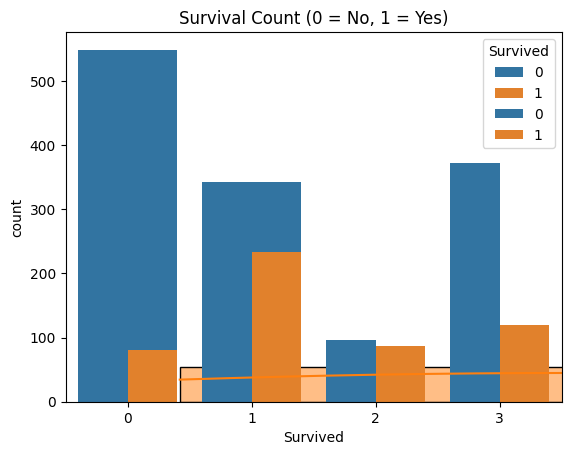

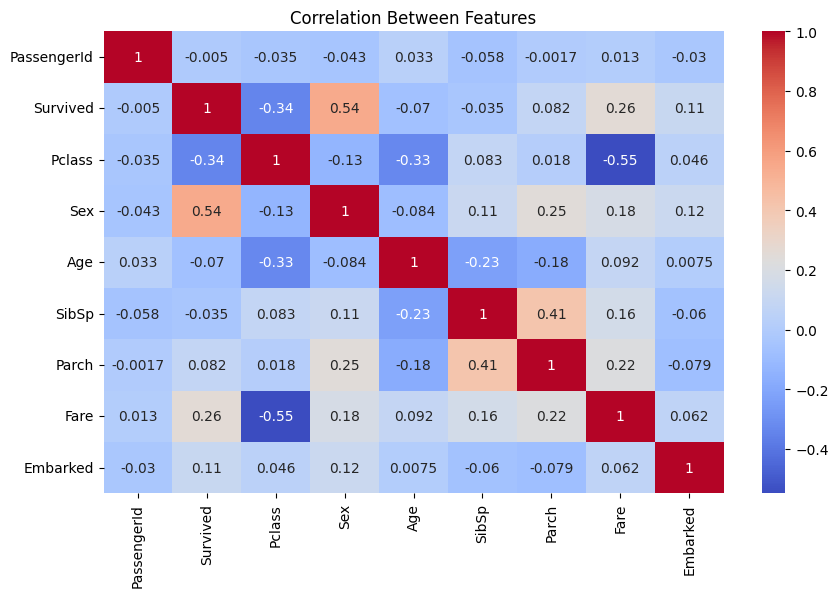

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('titanic.csv')

df.head() # Display First 5 rows
df.describe() # It is a summary statistics function in Pandas that gives you a quick overview of the numerical (or categorical, with a parameter) columns in your DataFrame.
""" count	Total number of non-missing (non-NaN) values in the column
    mean	Average value: sum of all values ÷ count
    std	    Standard deviation: how much values vary from the mean
    min	    Smallest value in the column
    25%	    25th percentile (Q1): 25% of values are below this
    50%	    Median (Q2): middle value (half values below and half above)
    75%	    75th percentile (Q3): 75% of values are below this
    max	    Highest value in the column """
df.info() # It Displays How many rows, columns, column names, Data Types and missing values of csv data
df.isnull().sum() # isnull() checks where the missing (null) values are. sum() counts the number of null values in each column.

df['Age'].fillna(df['Age'].mean(), inplace=True) # Fill missing Age values with the mean

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # Fill missing Embarked values with the mode
"""  mode() returns the most frequent occurred value
    [0] returns Sometimes, two or more values can occur the same number of times
    In That Case Just give me the first one from the list of the most frequent values."""

df.drop(['Cabin','Ticket'], axis = 1, inplace=True) # It removes the axis = 0(rows) and 1 (column)

# To convert categorical data into numerical data, because machine learning models can't directly understand strings they need numbers.
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Visualizing Who survived?
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")

# Visualizing Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df) # This creates a count plot. It automatically counts how many times each category appears and makes a bar plot.
"""hue splits each bar based on the values in the Sex column. So, instead of one bar for each Survived value, you'll get two bars inside each category:
One for Male, One for Female. This allows you to compare how many males and females survived vs. didn't survive """

# Visualizing Age distribution
sns.histplot(df['Age'], bins=10, kde=True) # It creates a histogram by selecting Age column. bins=10 tells Seaborn to divide the range of ages into 10 equal intervals
"""like 0-10, 10-20, 20-30 KDE is a smooth curve that estimates the probability distribution of the Age data.It helps you see the shape of the data more clearly.
for example, whether it's normal (bell-shaped), skewed, etc."""

# Visualizing Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=df) # It uses Pclass column and hue breaks each bar (Pclass) into sub-bars for Survived (1) and Not Survived (0).

# Correlation HeatMap - helps identify which features are strongly related to survival
numeric_df = df.select_dtypes(include=['int64', 'float64']) # We have to check if all columns are numeric (if not mapped to numbers), or others will block df.corr().
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm') # Correlation measures how two variables move together.When one column's value increases, does the other
#column also increase, decrease, or stay random?

plt.title("Correlation Between Features")
plt.show()

# Prepare Data for Machine Learning
X = df[['Age','Pclass','Sex','SibSp','Parch', 'Fare', 'Embarked']] # Selecting Variables you use to predict the outcome.
y = df['Survived'] # The outcome you're trying to predict.

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting the data into training and testing sets.
"""Training set: Used to train the model (X_train, y_train). Test set: Used to evaluate how well the model performs on unseen data (X_test, y_test)
test_size=0.2: Means 20% of the data will be used for testing, and 80% for training. random_state=42 Ensures that the split is reproducible. If you run the code again,
you'll get the same split every time. You can use any number here, not just 42"""

# Train a Model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
















